In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import os, sys
import warnings
%matplotlib inline

In [194]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/songs_normalize.csv")


In [195]:
df.info

<bound method DataFrame.info of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceabil

In [196]:
df.nunique()

artist               835
song                1879
duration_ms         1793
explicit               2
year                  23
popularity            76
danceability         565
energy               580
key                   12
loudness            1671
mode                   2
speechiness          837
acousticness        1208
instrumentalness     772
liveness             783
valence              760
tempo               1831
genre                 59
dtype: int64

In [197]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [198]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


Text(0.5, 0, 'Explicit?')

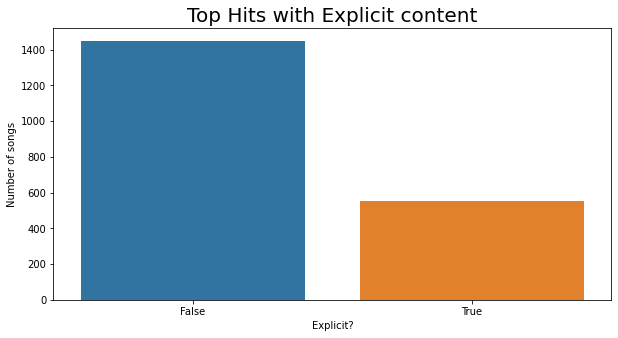

In [199]:
#Countplot of explicit songs
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.countplot(x="explicit", data=df)
ax.set_title("Top Hits with Explicit content", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Explicit?")

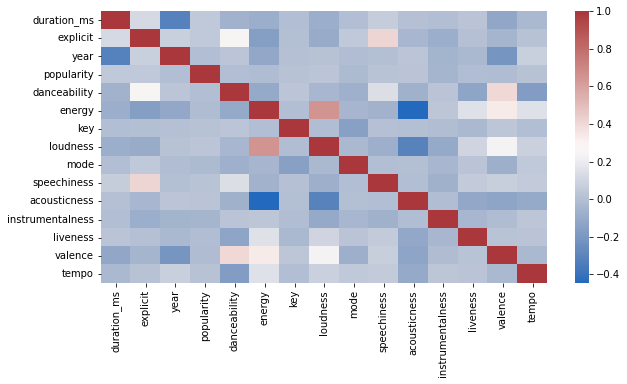

In [200]:
# Correlation between features
features = df.drop(["artist", "song"], axis=1)
corr = features.corr()
#Heatmap
sns.heatmap(corr, cmap="vlag")

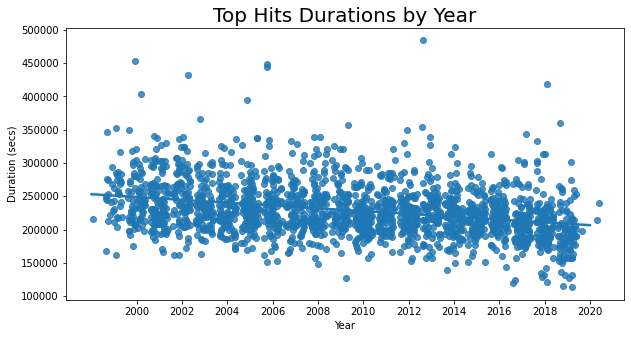

In [201]:
# Year vs duration_s
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.regplot(x="year", y="duration_ms", data=df, x_jitter=.4)
ax.set_title("Top Hits Durations by Year", fontsize=20)
ax.set_ylabel("Duration (secs)")
ax.set_xlabel("Year")
ax.set_xticks(np.arange(2000, 2021, 2))

In [202]:
from plotly.subplots import make_subplots

histogram_labels = ['popularity',
                    'danceability', 
                    'energy', 
                    'speechiness', 
                    'loudness', 
                    'acousticness', 
                    'liveness', 
                    'instrumentalness',
                    'valence',
                    'tempo'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       height=400, 
                       width=500,
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 <a list of 20 Text major ticklabel objects>)

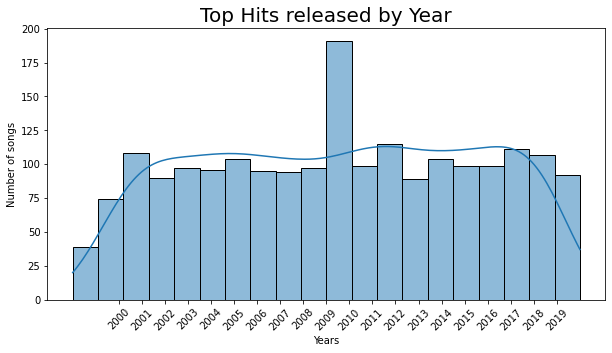

In [203]:
#Top Hits by Year
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.histplot(x="year", data=df, kde=True, bins=20)
ax.set_title("Top Hits released by Year", fontsize=20)
ax.set_ylabel("Number of songs")
ax.set_xlabel("Years")
ax.set_xticks(range(2000, 2020, 1)) #Show all years
plt.xticks(rotation=45) #Avoid overlapping years

In [204]:
# Explode the genre column
df.genre = df.genre.apply(lambda x: x.split(", "))
df_genre_exp = df.explode("genre")
# Craft "genres" DataFrame
genre_cols = df_genre_exp.columns.values[4:-1] #From popularity to duration_s
genre_cols = np.append(genre_cols, ["explicit"])
genres = df_genre_exp.groupby("genre")[genre_cols].mean().reset_index()
#See results
genres.head()

,genre,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit
0,Dance/Electronic,2012.405128,54.982051,0.666792,0.767123,5.728205,-5.156803,0.507692,0.079590,0.109717,0.037398,0.183441,0.536671,124.177836,0.117949
1,Folk/Acoustic,2006.750000,60.200000,0.567400,0.728550,4.600000,-6.353800,0.750000,0.042185,0.197199,0.043269,0.188910,0.579250,110.348050,0.050000
2,R&B,2007.075221,58.703540,0.689418,0.661312,5.320796,-5.906188,0.522124,0.114405,0.152884,0.006452,0.161860,0.563156,115.380861,0.278761
3,World/Traditional,2006.300000,53.800000,0.603000,0.685700,3.900000,-6.187800,0.600000,0.079530,0.272961,0.198378,0.194410,0.653700,110.333200,0.100000
4,blues,2004.000000,45.500000,0.649750,0.669750,4.250000,-5.616500,0.500000,0.091900,0.021052,0.112260,0.171200,0.495500,122.932250,0.000000


Text(0.5, 0, 'Average popularity')

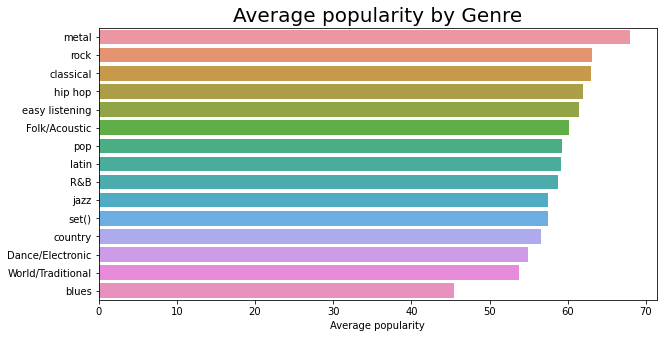

In [205]:
plt.rcParams["figure.figsize"] = (10,5)
ax = sns.barplot(x="popularity", y="genre",
                  data=genres.sort_values("popularity", ascending=False))
ax.set_title("Average popularity by Genre", fontsize=20)
ax.set_ylabel("")
ax.set_xlabel("Average popularity")

In [206]:
# Organizing the number of songs released per year
songs_per_year = (df.year.value_counts().rename_axis('year').reset_index(name = 'songs'))
songs_per_year

,year,songs
0,2012,115
1,2017,111
2,2001,108
3,2018,107
4,2010,107
5,2014,104
6,2005,104
7,2011,99
8,2016,99
9,2015,99


AttributeError: ignored

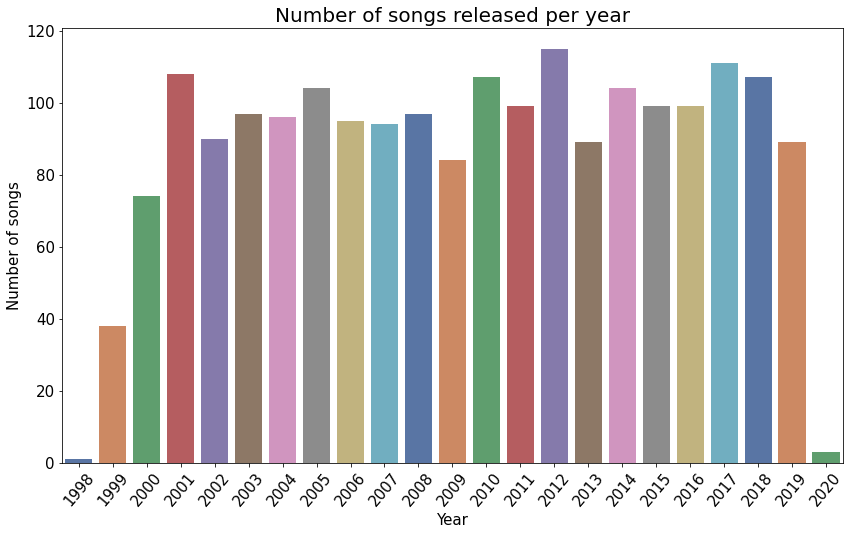

In [207]:
# Plotting songs_per_year in a bar chart
plt.figure(figsize=(14,8))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()